In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import warnings

#defining parameters
length = 10
EI = [0,0.02,0,0,0,-0.31,2] #degree 6 polynomial
xs = np.linspace(0,length,11)
mz_eiofx = []
my_eiofx = []
mx_eiofx = []


fp = [0, 0.3, 0.8]
r_p = [0,0,0] #wrt standard xyz coordinate 


In [33]:
L_p = [10,-5,-15]
moment_grip = np.cross(L_p,fp)
moment_head = np.cross(r_p,fp)
print(moment_grip)
print(moment_head)

[ 0.5 -8.   3. ]
[0. 0. 0.]


In [27]:
#y deflection
moment_z_points = []
for x in xs:
    result = ((length-x)*moment_head[2])/length+(x/length)*moment_grip[2]
    print("m_z", result)
    moment_z_points.append(result)
    stiffness = EI[0]*x**6+EI[1]*x**5+EI[2]*x**4+EI[3]*x**3+EI[4]*x**2+EI[5]*x+EI[6]
    mz_eiofx.append(result/stiffness)
d2y_pts = np.array(mz_eiofx)

d2y = np.polyfit(xs,d2y_pts,6)
print("m_z/EI", mz_eiofx)
print("d2y coefficients",d2y)

m_z 0.0
m_z 0.30000000000000004
m_z 0.6000000000000001
m_z 0.8999999999999999
m_z 1.2000000000000002
m_z 1.5
m_z 1.7999999999999998
m_z 2.0999999999999996
m_z 2.4000000000000004
m_z 2.7
m_z 3.0
m_z/EI [0.0, 0.1754385964912281, 0.29702970297029707, 0.1517706576728499, 0.05649717514124294, 0.02382843526608419, 0.011563664396762173, 0.006250558085543352, 0.0036647935499633526, 0.002287767223921572, 0.0015008254539996997]
d2y coefficients [ 3.37474151e-05 -9.20281760e-04  8.31972874e-03 -2.13738665e-02
 -6.40405306e-02  2.87170821e-01 -5.59416982e-03]


[-0.011188339643673531, 0.34814821702024557, 0.4997902102174916, 1.0515701547569682, 1.6190108761046482, 0.5518627462798218, -0.6236712260887302, 4.778225207629558, 11.956400567014219, -13.106934162251736, 9.436785749138538]


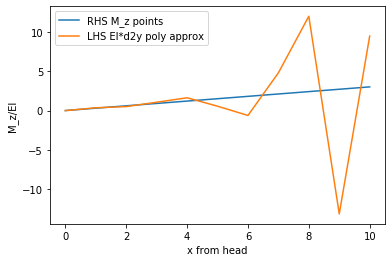

In [28]:
fx=[]
for i in xs:
    ydblprime = d2y[0]*i**6+d2y[1]*i**5+d2y[2]*i**4+d2y[3]*i**3+d2y[4]*i**2+d2y[5]*i+d2y[6]
    stiffness = EI[0]*i**6+EI[1]*i**5+EI[2]*i**4+EI[3]*i**3+EI[4]*i**2+EI[5]*i+EI[6]
    fx.append(ydblprime*stiffness)
    
print(fx)
plt.xlabel("x from head")
plt.ylabel("M_z/EI")
plt.plot(xs,moment_z_points, label="RHS M_z points") #actual M/EI points
plt.plot(xs,fx, label = "LHS EI*d2y poly approx") #polynomial approximation of M
plt.legend(loc="upper left")

In [29]:
dy = np.polyint(d2y)
dy[-1]= (-1*np.polyval(dy, length)) #boundary condition = 0
print(dy)
w_y = np.polyint(dy)
w_y[-1]= (-1*np.polyval(w_y, length))
print(w_y)
w_y_pts=[]
for i in xs:
    w_y_pts.append(w_y[0]*i**8+w_y[1]*i**7+w_y[2]*i**6+w_y[3]*i**5+w_y[4]*i**4+w_y[5]*i**3+w_y[6]*i**2+w_y[7]*i+w_y[8])

[ 4.82105930e-06 -1.53380293e-04  1.66394575e-03 -5.34346662e-03
 -2.13468435e-02  1.43585411e-01 -5.59416982e-03 -7.45964074e-01]
[ 6.02632412e-07 -2.19114705e-05  2.77324291e-04 -1.06869332e-03
 -5.33671088e-03  4.78618035e-02 -2.79708491e-03 -7.45964074e-01
  1.64115915e+00]


[1.6411591496469569, 0.9341104053732115, 0.4164498896636746, 0.13659869228556798, 0.03158185212325293, 0.0057878626629890295, -0.006483606739097647, -0.020076099005160275, -0.020725053247649727, -0.006294831941380474, 1.7541523789077473e-14]


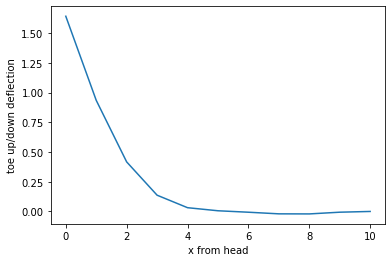

In [30]:
plt.xlabel("x from head")
plt.ylabel("toe up/down deflection")
plt.plot(xs, w_y_pts);
print(w_y_pts)

0.0
-0.8
-1.6
-2.4
-3.2
-4.0
-4.8
-5.6
-6.4
-7.2
-8.0


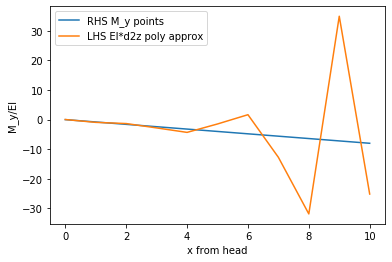

In [31]:
#z deflection
moment_y_points = []
for x in xs:
    result = ((length-x)*moment_head[1])/length+(x/length)*moment_grip[1]
    print(result)
    moment_y_points.append(result)
    stiffness = EI[0]*x**6+EI[1]*x**5+EI[2]*x**4+EI[3]*x**3+EI[4]*x**2+EI[5]*x+EI[6]
    my_eiofx.append(result/stiffness)
d2z_pts = np.array(my_eiofx)
d2z = np.polyfit(xs,d2z_pts,6)
#print("m_y/EI", my_eiofx)
#print("d2z coefficients",d2z)


gx=[]
for i in xs:
    stiffness = EI[0]*i**6+EI[1]*i**5+EI[2]*i**4+EI[3]*i**3+EI[4]*i**2+EI[5]*i+EI[6]
    zdblprime = d2z[0]*i**6+d2z[1]*i**5+d2z[2]*i**4+d2z[3]*i**3+d2z[4]*i**2+d2z[5]*i+d2z[6]
    gx.append(stiffness*zdblprime)
    

plt.xlabel("x from head")
plt.ylabel("M_y/EI")
plt.plot(xs,moment_y_points, label="RHS M_y points") #actual M/EI points
plt.plot(xs,gx, label = "LHS EI*d2z poly approx") #polynomial approximation of M
plt.legend(loc="upper left") #polynomial approximation of M/EI

[-4.37642439905747, -2.4909610809943223, -1.110533039102393, -0.36426317942760456, -0.08421827232825585, -0.015434300434360892, 0.017289617971072424, 0.05353626401378442, 0.05526680866034006, 0.016786218510183915, 5.5067062021407764e-14]


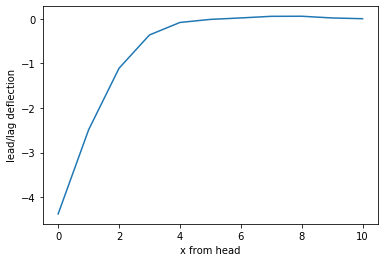

In [32]:
dz = np.polyint(d2z)
dz[-1]= (-1*np.polyval(dz, length))#boundary condition
#print(dz)
w_z = np.polyint(dz)
w_z[-1]= (-1*np.polyval(w_z, length))
w_z_pts=[]
#print(w_z)
for i in xs:
    w_z_pts.append(w_z[0]*i**8+w_z[1]*i**7+w_z[2]*i**6+w_z[3]*i**5+w_z[4]*i**4+w_z[5]*i**3+w_z[6]*i**2+w_z[7]*i+w_z[8])


plt.xlabel("x from head")
plt.ylabel("lead/lag deflection")
plt.plot(xs, w_z_pts);
print(w_z_pts)
    